# Neural Modelling Assignment 3
Submission Group: Luca Kosina (6084778), Sascha Mühlinghaus (7075485)

### Part 1: TD Learning

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [58]:
n_trials = np.linspace(0, 300, 300)  # X-axis values (trials)
t = np.linspace(0, 300, 300)       # Y-axis values (time or t)
T, Trials = np.meshgrid(t, n_trials)  # Create a mesh grid for X and Y
alpha = 0.1 # learning rate
u_stim = np.concatenate((np.zeros(99), np.ones(1), np.zeros(200))) # stimuli array
rewards = np.concatenate((np.zeros(199), np.ones(1), np.zeros(100))) # reward array (1 for reward, 0 for no reward)
v_before = np.zeros(300) # value array
delta_v_before = np.zeros(300) # prediction error array
delta_before = np.zeros(300) # weight change array
delta_weight_before = np.concatenate((np.zeros(99), np.ones(1), np.zeros(200))) # delta weight

In [59]:
def update_weights(alpha, stimuli, rewards, n_trials):
    V = np.zeros((len(stimuli))) # initialize value array for time points
    W = np.zeros(len(stimuli)) # initialize weight for each time point
    delta = np.zeros([len(n_trials), len(stimuli)]) # initialize 2D array for trial x time
    delta_v = np.zeros((len(stimuli))) # initialize array for delta v

    for i in range(1, len(n_trials)):
        # for every trial do the following
        for t in range(1, len(stimuli)):
            for w in range(1, t):
                # compute the prediction error V 
                V[t] += W[w] * stimuli[w]
            # compute delta_v for every time point
            delta_v[t-1] = V[t] - V[t-1]
            # compute delta for every time step
            delta[i, t] = rewards[t-1] + delta_v[t-1]
            for w in range(1, t):
                # compute weight update 
                weight_update = rewards[t] + alpha*delta[i, t]*stimuli[t]
                # update every weight in the past
                W[w] = weight_update

    return W, V, delta_v, delta

In [60]:
# call the temporal difference learning function
W_after, V_after, delta_v_after, delta_weight_after = update_weights(alpha, u_stim, rewards, n_trials)

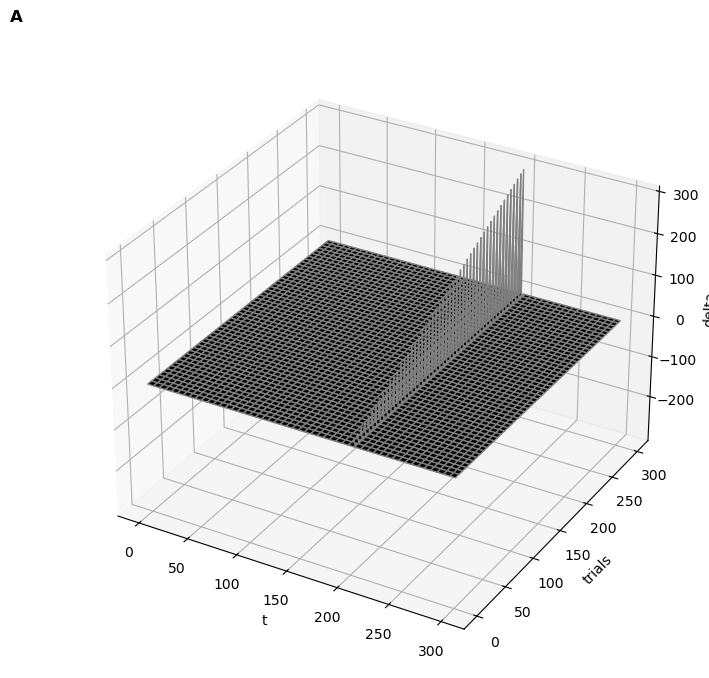

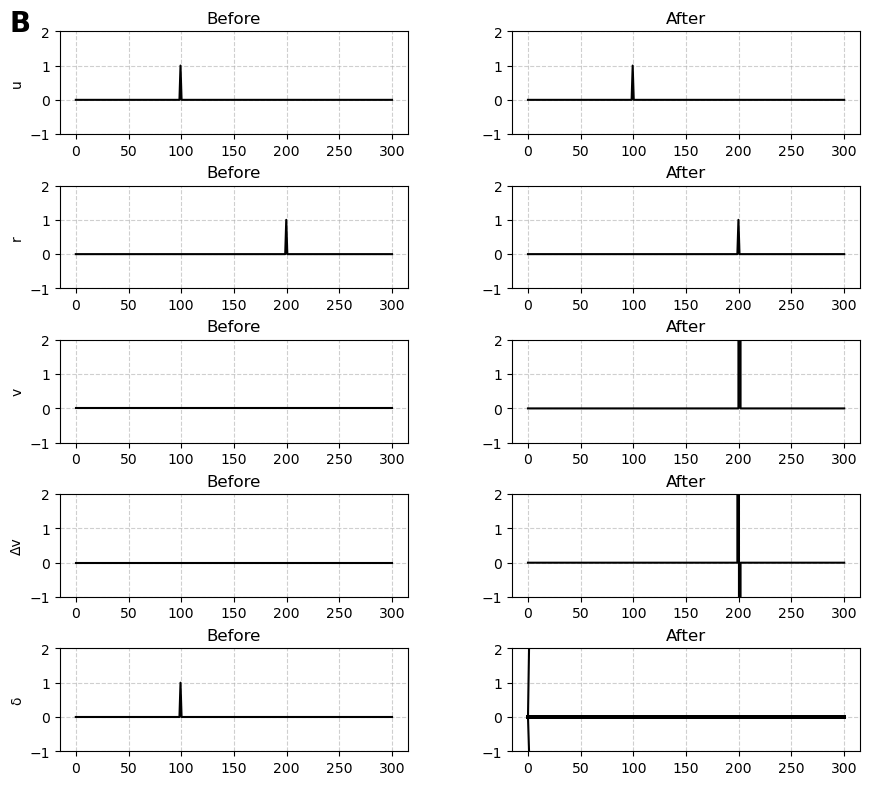

In [70]:
data_before = [u_stim, rewards, v_before, delta_v_before, delta_weight_before]
data_after = [u_stim, rewards, V_after, delta_v_after, delta_weight_after]
labels = ['u', 'r', 'v', 'Δv', 'δ']

# --- Panel A: 3D Surface Plot ---
fig_a = plt.figure(figsize=(10, 8))
ax1 = fig_a.add_subplot(111, projection='3d')
ax1.plot_surface(T, Trials, delta_weight_after, color='k', edgecolor='gray')
ax1.set_xlabel('t')
ax1.set_ylabel('trials')
ax1.set_zlabel('delta')
ax1.text2D(-0.1, 1.05, "A", transform=ax1.transAxes, fontsize=12, fontweight='bold')

# Show the figure for Panel A
plt.show()

# --- Panel B: Line Plots ---
fig_b = plt.figure(figsize=(10, 8))  # Adjusted for enough space
for i, (data_b, data_a, label) in enumerate(zip(data_before, data_after, labels)):
    # Before subplot: left column
    ax2 = fig_b.add_subplot(5, 2, 2 * i + 1)  # Corrected for left column
    ax2.plot(t, data_b, color='black')
    ax2.set_ylabel(label, rotation=90)
    ax2.set_ylim(-1, 2)
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.set_title('Before')
    
    # After subplot: right column
    ax3 = fig_b.add_subplot(5, 2, 2 * i + 2)  # Corrected for right column
    ax3.plot(t, data_a, color='black')
    ax3.set_ylim(-1, 2)
    ax3.grid(True, linestyle='--', alpha=0.6)
    ax3.set_title('After')

# Add panel label "B"
fig_b.text(0.05, 0.95, "B", fontsize=20, fontweight='bold')

# Adjust layout for Panel B to prevent overlap
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05, hspace=0.5, wspace=0.3)

# Show the figure for Panel B
plt.show()
